<a href="https://colab.research.google.com/github/Meaveryway/ML_Tests/blob/master/%5BPFE_Anti_Plagiat%5D_Trying_out_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install transformers

     |████████████████████████████████| 1.5MB 8.9MB/s 
     |████████████████████████████████| 890kB 33.5MB/s 
     |████████████████████████████████| 2.9MB 43.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=bad0e29ff995c8580c2353aba1cb76ec1aba413591190014aaf35ebd79c80bb0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

# Importing BERT
DistilBERT est une version allégée et beaucoup plus rapide de BERT, avec une perte en performance assez minime

In [ ]:
# Pour DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Pour BERT standard
# model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
data = pd.read_csv('/content/gdrive/MyDrive/PFE - Anti-Plagiat/strings.csv', delimiter=';', header=None)
data = data[:8]
data

,0,1
0,It’s all the more important because the futur...,NaN
1,An estimated 140 million people lost their job...,NaN
2,An evaluated 140 million individuals misplaced...,NaN
3,"As the lockdown was eased, many went back to w...",NaN
4,t’s all the more vital since the long run for ...,NaN
5,"As the lockdown was facilitated, numerous went...",NaN
6,while many others saw their salaries drastical...,NaN
7,whereas numerous others saw their pay rates de...,NaN


In [ ]:
tokenized_data = data[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized_data

0    [101, 2009, 1521, 1055, 2035, 1996, 2062, 2590...
1    [101, 2019, 4358, 8574, 2454, 2111, 2439, 2037...
2    [101, 2019, 16330, 8574, 2454, 3633, 28616, 22...
3    [101, 2004, 1996, 5843, 7698, 2001, 10987, 101...
4    [101, 1056, 1521, 1055, 2035, 1996, 2062, 8995...
5    [101, 2004, 1996, 5843, 7698, 2001, 19601, 101...
6    [101, 2096, 2116, 2500, 2387, 2037, 20566, 210...
7    [101, 6168, 3365, 2500, 2387, 2037, 3477, 6165...
Name: 0, dtype: object

In [ ]:
max_len = 0
for i in tokenized_data.values:
    if len(i) > max_len:
        max_len = len(i)

padded_data = np.array([i + [0]*(max_len-len(i)) for i in tokenized_data.values])

In [ ]:
print(np.array(padded_data).shape)
padded_data

(8, 35)


array([[  101,  2009,  1521,  1055,  2035,  1996,  2062,  2590,  2138,
         1996,  2925,  2005,  3514,  1998,  3806,  3316,  2003,  2062,
         9662,  2084,  2412,  1010,  2029,  3084,  1996,  2925,  1997,
         2037, 13117,  2015,  2062,  9662,  1010,   102,     0],
       [  101,  2019,  4358,  8574,  2454,  2111,  2439,  2037,  5841,
         2044,  2634,  5299,  2091,  2049,  4610,  1999,  2233,  2000,
         2644,  1996,  8293,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [  101,  2019, 16330,  8574,  2454,  3633, 28616, 22829,  2037,
         6107,  2015,  2044,  2634, 18088,  2091,  2049,  4610,  1999,
         3328,  2000,  9190,  1996, 17748,  1011,  2039,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [  101,  2004,  1996,  5843,  7698,  2001, 10987,  1010,  2116,
         2253,  2067,  2000,  2147,  1010,  2021,  2062,  2084,  2416,
         2454,  2111,  2

In [ ]:
attention_mask = np.where(padded_data != 0, 1, 0)
attention_mask.shape

(8, 35)

In [ ]:
input_ids = torch.tensor(padded_data)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
last_hidden_states

BaseModelOutput([('last_hidden_state',
                  tensor([[[ 0.0660, -0.0181, -0.0963,  ..., -0.0901,  0.5605,  0.2927],
                           [-0.1691, -0.3056, -0.2971,  ...,  0.1781,  0.6015,  0.1504],
                           [ 0.1936, -0.1980,  0.9554,  ...,  0.0653,  0.1003, -0.1532],
                           ...,
                           [-0.1329, -0.3221, -0.1264,  ...,  0.2939,  0.4699, -0.1675],
                           [ 0.3842,  0.2835,  0.0764,  ...,  0.0599, -0.1860, -0.7137],
                           [-0.0440, -0.0828,  0.0462,  ...,  0.2104,  0.1965,  0.2273]],
                  
                          [[-0.1571, -0.2777, -0.2036,  ..., -0.2306,  0.2623,  0.0264],
                           [-0.0872, -0.0878, -0.4473,  ..., -0.0924,  0.7465, -0.0404],
                           [ 0.0802, -0.1467, -0.2955,  ..., -0.2977,  0.2818, -0.3092],
                           ...,
                           [-0.1633, -0.2039, -0.1603,  ..., -0.1330, -0.011

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
features

array([[ 0.0659513 , -0.01806026, -0.09626837, ..., -0.09005176,
         0.56052524,  0.29271957],
       [-0.15710564, -0.2777346 , -0.20360896, ..., -0.23059864,
         0.2623404 ,  0.02639246],
       [-0.14884777, -0.24344797, -0.17423004, ..., -0.29352722,
         0.4945906 ,  0.01734499],
       ...,
       [-0.05328703, -0.03208537, -0.12271914, ..., -0.18011585,
         0.25056118,  0.12145836],
       [-0.05857902, -0.2773153 , -0.24032865, ..., -0.14391048,
         0.40543303,  0.16404425],
       [-0.00129021, -0.23748294, -0.1613334 , ..., -0.17072962,
         0.53042907,  0.15803434]], dtype=float32)

In [ ]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(features[0], features[1])/(norm(features[0])*norm(features[1]))
print("Similarity =", cos_sim, "for sentences: \n-", data[0][0], "\n -", data[0][1])

Similarity = 0.7890356 for sentences: 
-  It’s all the more important because the future for oil and gas companies is more uncertain than ever, which makes the future of their pipelines more uncertain, 
 - An estimated 140 million people lost their jobs after India locked down its economy in March to stop the outbreak


In [ ]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(features)
#similarity_matrix[similarity_matrix > 0.99999] = float("nan")
print(similarity_matrix)

[[1.000 0.789 0.887 0.914 0.971 0.906 0.883 0.891]
 [0.789 1.000 0.901 0.866 0.777 0.837 0.879 0.851]
 [0.887 0.901 1.000 0.923 0.901 0.924 0.948 0.944]
 [0.914 0.866 0.923 1.000 0.908 0.978 0.915 0.910]
 [0.971 0.777 0.901 0.908 1.000 0.908 0.883 0.895]
 [0.906 0.837 0.924 0.978 0.908 1.000 0.907 0.908]
 [0.883 0.879 0.948 0.915 0.883 0.907 1.000 0.987]
 [0.891 0.851 0.944 0.910 0.895 0.908 0.987 1.000]]


0     It’s all the more important because the futur...
1    An estimated 140 million people lost their job...
2    An evaluated 140 million individuals misplaced...
3    As the lockdown was eased, many went back to w...
4    t’s all the more vital since the long run for ...
5    As the lockdown was facilitated, numerous went...
6    while many others saw their salaries drastical...
7    whereas numerous others saw their pay rates de...
Name: 0, dtype: object


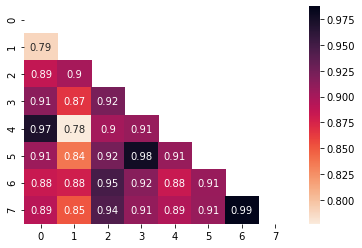

In [ ]:
print(data[0])

import seaborn as sns
mask = np.triu(similarity_matrix)
cmap = sns.cm.rocket_r
sns.heatmap(similarity_matrix, annot=True, mask=mask, cmap=cmap)

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
distance_matrix_manhattan = manhattan_distances(features)
#similarity_matrix[similarity_matrix > 0.99999] = float("nan")
# normalisation:
norm = np.linalg.norm(distance_matrix_manhattan)
similarity_matrix_manhattan = 1- distance_matrix_manhattan/norm
print(similarity_matrix_manhattan)

[[1.000 0.797 0.864 0.880 0.933 0.878 0.857 0.864]
 [0.797 1.000 0.858 0.834 0.796 0.823 0.842 0.826]
 [0.864 0.858 1.000 0.886 0.873 0.893 0.905 0.904]
 [0.880 0.834 0.886 1.000 0.876 0.938 0.879 0.876]
 [0.933 0.796 0.873 0.876 1.000 0.881 0.860 0.869]
 [0.878 0.823 0.893 0.938 0.881 1.000 0.875 0.879]
 [0.857 0.842 0.905 0.879 0.860 0.875 1.000 0.953]
 [0.864 0.826 0.904 0.876 0.869 0.879 0.953 1.000]]


0     It’s all the more important because the futur...
1    An estimated 140 million people lost their job...
2    An evaluated 140 million individuals misplaced...
3    As the lockdown was eased, many went back to w...
4    t’s all the more vital since the long run for ...
5    As the lockdown was facilitated, numerous went...
6    while many others saw their salaries drastical...
7    whereas numerous others saw their pay rates de...
Name: 0, dtype: object


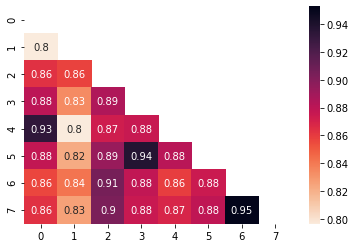

In [ ]:
print(data[0])

mask_manhattan = np.triu(similarity_matrix_manhattan)
cmap = sns.cm.rocket_r
sns.heatmap(similarity_matrix_manhattan, annot=True, mask=mask_manhattan, cmap=cmap)

In [ ]:
from sklearn.metrics import pairwise_distances
distance_matrix_euclidean_2 = pairwise_distances(features, metric = "cityblock")
#similarity_matrix[similarity_matrix > 0.99999] = float("nan")

# normalisation:
norm = np.linalg.norm(distance_matrix_euclidean_2)
similarity_matrix_euclidean_2 = 1- distance_matrix_euclidean_2/norm


print(similarity_matrix_euclidean_2)

[[1.000 0.797 0.864 0.880 0.933 0.878 0.857 0.864]
 [0.797 1.000 0.858 0.834 0.796 0.823 0.842 0.826]
 [0.864 0.858 1.000 0.886 0.873 0.893 0.905 0.904]
 [0.880 0.834 0.886 1.000 0.876 0.938 0.879 0.876]
 [0.933 0.796 0.873 0.876 1.000 0.881 0.860 0.869]
 [0.878 0.823 0.893 0.938 0.881 1.000 0.875 0.879]
 [0.857 0.842 0.905 0.879 0.860 0.875 1.000 0.953]
 [0.864 0.826 0.904 0.876 0.869 0.879 0.953 1.000]]


0     It’s all the more important because the futur...
1    An estimated 140 million people lost their job...
2    An evaluated 140 million individuals misplaced...
3    As the lockdown was eased, many went back to w...
4    t’s all the more vital since the long run for ...
5    As the lockdown was facilitated, numerous went...
6    while many others saw their salaries drastical...
7    whereas numerous others saw their pay rates de...
Name: 0, dtype: object


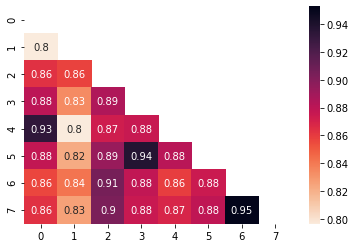

In [ ]:
print(data[0])
mask_euclidean_2 = np.triu(similarity_matrix_euclidean_2)
cmap = sns.cm.rocket_r
sns.heatmap(similarity_matrix_euclidean_2, annot=True, mask=mask_euclidean_2, cmap=cmap)

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'